In [57]:
#hide
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

#           Anne's Garden
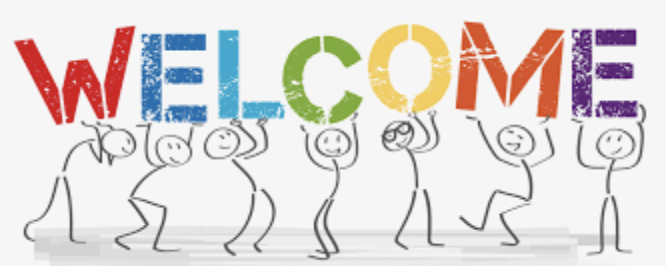

In [2]:
#hide
from fastbook import *
from fastai.vision.widgets import *

ModuleNotFoundError: ignored

In [60]:
# key = os.environ.get('AZURE_SEARCH_KEY', 'a3a167ab3aa1444ab356d1e64f4a86ec')

In [61]:
# search_images_bing

<function fastbook.search_images_bing>

In [72]:
#hide
#ims = ['http://t3.gstatic.com/licensed-image?q=tbn:ANd9GcQThTXbLqJkYzI69dBb-oxoyCgMU3NWuho91Rds7iV4E8x0-wkPOY8pR9JKworcrLygZiZU6yRY6GKV7A86Wds']

In [73]:
# os.mkdir('images')

In [74]:
# dest = 'images/succulent.jpg'
# dest = 'succulent.jpg'
# download_url(ims[0], dest)

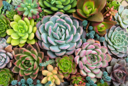

In [75]:
# im = Image.open(dest)
# im.to_thumb(128,128)

In [79]:
plant_types = 'tree','cactus','succulent'
path = Path('gardens')

In [80]:
# if not path.exists():
#     path.mkdir()
#     for o in plant_types:
#         dest = (path/o)
#         dest.mkdir(exist_ok=True)
#         results = search_images_bing(key, f'{o} garden')
#         download_images(dest, urls=results.attrgot('contentUrl'))

In [81]:
# fns = get_image_files(path)
# fns

(#416) [Path('gardens/cactus/00000025.jpg'),Path('gardens/cactus/00000130.jpeg'),Path('gardens/cactus/00000027.JPG'),Path('gardens/cactus/00000011.jpg'),Path('gardens/cactus/00000069.jpg'),Path('gardens/cactus/00000146.jpg'),Path('gardens/cactus/00000078.jpeg'),Path('gardens/cactus/00000100.jpg'),Path('gardens/cactus/00000008.JPG'),Path('gardens/cactus/00000077.jpg')...]

In [82]:
# failed = verify_images(fns)
# failed

(#3) [Path('gardens/cactus/00000041.jpeg'),Path('gardens/tree/00000074.jpg'),Path('gardens/tree/00000148.jpg')]

In [83]:
# failed.map(Path.unlink);

In [84]:
# gardens = DataBlock(
#     blocks=(ImageBlock, CategoryBlock), 
#     get_items=get_image_files, 
#     splitter=RandomSplitter(valid_pct=0.2, seed=42),
#     get_y=parent_label,
#     item_tfms=Resize(128))

In [85]:
# dls = gardens.dataloaders(path)

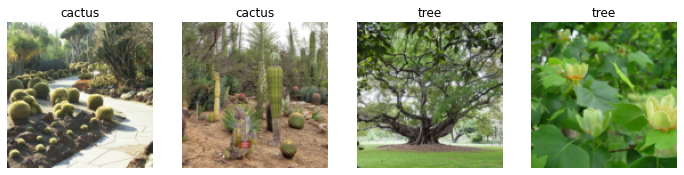

In [86]:
# dls.valid.show_batch(max_n=4, nrows=1)

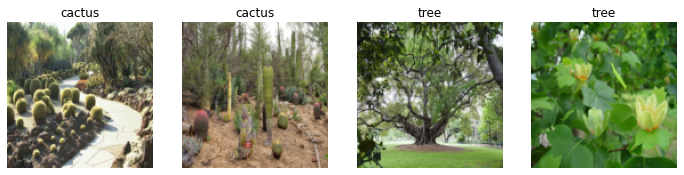

In [87]:
# gardens = gardens.new(item_tfms=Resize(128, ResizeMethod.Squish))
# dls = gardens.dataloaders(path)
# dls.valid.show_batch(max_n=4, nrows=1)

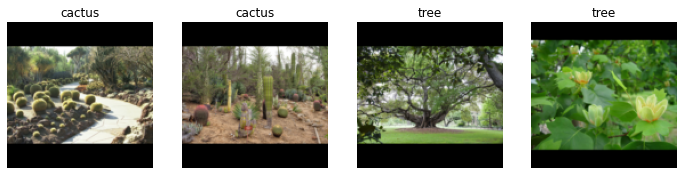

In [88]:
# gardens = gardens.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros'))
# dls = gardens.dataloaders(path)
# dls.valid.show_batch(max_n=4, nrows=1)

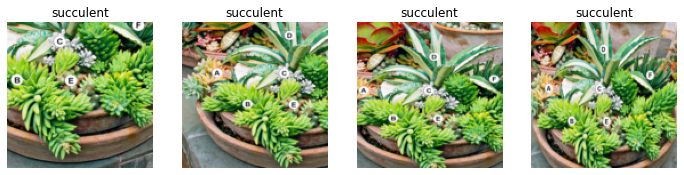

In [89]:
# gardens = gardens.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
# dls = gardens.dataloaders(path)
# dls.train.show_batch(max_n=4, nrows=1, unique=True)

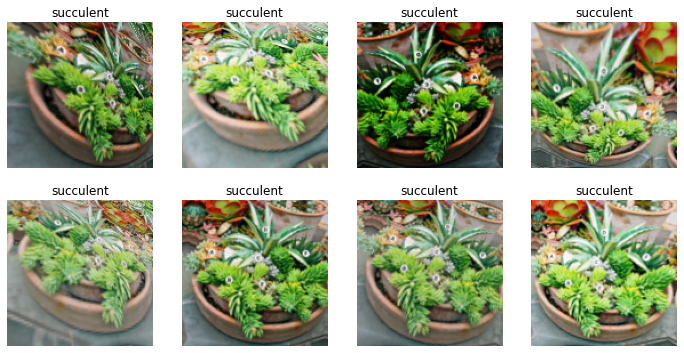

In [90]:
# gardens = gardens.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
# dls = gardens.dataloaders(path)
# dls.train.show_batch(max_n=8, nrows=2, unique=True)

In [91]:
# gardens = gardens.new(
#     item_tfms=RandomResizedCrop(224, min_scale=0.5),
#     batch_tfms=aug_transforms())
# dls = gardens.dataloaders(path)

In [92]:
# learn = cnn_learner(dls, resnet18, metrics=error_rate)
# learn.fine_tune(4)


Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


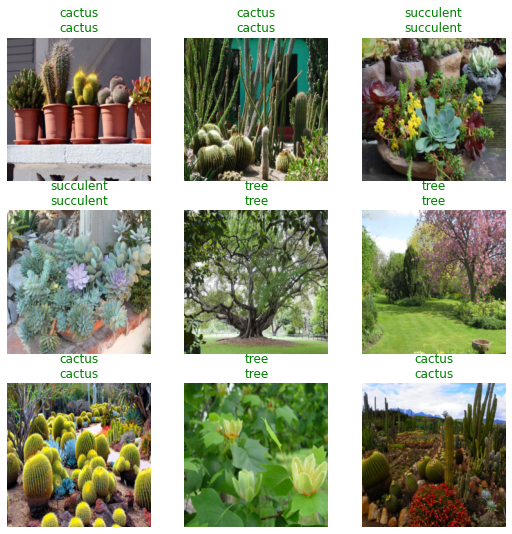

In [101]:
# learn.show_results()

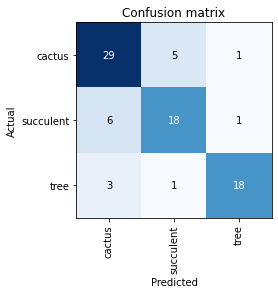

In [102]:
# interp = ClassificationInterpretation.from_learner(learn)
# interp.plot_confusion_matrix()


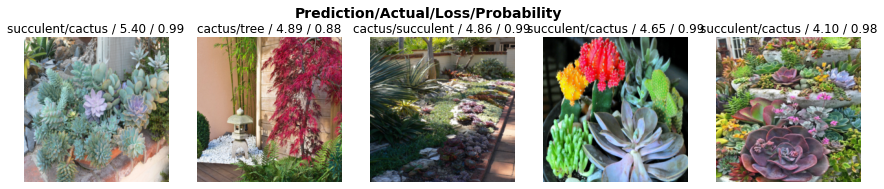

In [103]:
# interp.plot_top_losses(5, nrows=1)

In [95]:
# cleaner = ImageClassifierCleaner(learn)
# cleaner

In [96]:
#hide
#for idx in cleaner.delete(): cleaner.fns[idx].unlink()
#for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

In [104]:
# learn.export()

In [105]:
path = Path()
#path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [106]:
learn_inf = load_learner(path/'export.pkl')

In [107]:
# learn_inf.predict('succulent.jpg')

('succulent', tensor(1), tensor([3.3264e-03, 9.9650e-01, 1.7308e-04]))

In [108]:
# learn_inf.dls.vocab

['cactus', 'succulent', 'tree']

In [ ]:
# btn_upload = widgets.FileUpload()
# btn_upload

FileUpload(value={}, description='Upload')

In [ ]:
#hide
# For the book, we can't actually click an upload button, so we fake it
#btn_upload = SimpleNamespace(data = ['images/succulent.jpg'])

In [ ]:
# img = PILImage.create(btn_upload.data[-1])

In [ ]:
# out_pl = widgets.Output()
# out_pl.clear_output()
# with out_pl: display(img.to_thumb(128,128))
# out_pl

Output()

In [ ]:
# pred,pred_idx,probs = learn_inf.predict(img)

In [ ]:
# lbl_pred = widgets.Label()
# lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
# lbl_pred

Label(value='Prediction: succulent; Probability: 0.9982')

In [ ]:
btn_run = widgets.Button(description='Classify')
# btn_run

Button(description='Classify', style=ButtonStyle())

In [ ]:
btn_upload = widgets.FileUpload()
out_pl = widgets.Output()
lbl_pred = widgets.Label()

In [ ]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [ ]:
#hide
#Putting back btn_upload to a widget for next cell
btn_upload = widgets.FileUpload()

## Upload your plant file!

In [ ]:
VBox([widgets.Label('Select your plant!'), btn_upload, btn_run, out_pl, lbl_pred])

In [ ]:
#hide
# !pip install voila
# !jupyter serverextension enable --sys-prefix voila 

[<function _initialize_master_working_set.<locals>.<lambda> at 0x7f75c6f30e18>]


 google-colab 1.0.0
 httpimport 0.5.18
 python-chess 0.23.11
 dm-tree 0.1.5
 tensorflow-probability 0.12.1
 pyglet 1.5.0
 testpath 0.4.4
 srsly 1.0.5
 gspread-dataframe 3.0.8
 tqdm 4.41.1
 mkl 2019.0
 SQLAlchemy 1.3.22
 cloudpickle 1.3.0
 gin-config 0.4.0
 pyviz-comms 2.0.1
 textgenrnn 1.4.1
 hyperopt 0.1.2
 LunarCalendar 0.0.9
 umap-learn 0.4.6
 simplegeneric 0.8.1
 convertdate 2.2.0
 idna 2.10
 lightgbm 2.2.3
 py 1.10.0
 Bottleneck 1.3.2
 google-auth-httplib2 0.0.4
 Markdown 3.3.3
 urllib3 1.24.3
 imblearn 0.0
 thinc 7.4.0
 pyasn1 0.4.8
 jieba 0.42.1
 oauthlib 3.1.0
 editdistance 0.5.3
 fastdtw 0.3.4
 certifi 2020.12.5
 tensorflow-hub 0.11.0
 blis 0.4.1
 korean-lunar-calendar 0.2.1
 osqp 0.6.2
 dopamine-rl 1.0.5
 prefetch-generator 1.0.1
 google-cloud-translate 1.5.0
 sphinxcontrib-websupport 1.2.4
 toolz 0.11.1
 tblib 1.7.0
 sortedcontainers 2.3.0
 python-dateutil 2.8.1
 patsy 0.5.1
 Keras-Preprocessing 1.1.2
 jedi 0.18.0
 tensorflow-estimator 2.4.0
 Cython 0.29.21
 HeapDict 1.0.1
 

In [32]:
# !pip freeze >requirement.txt

absl-py==0.10.0
alabaster==0.7.12
albumentations==0.1.12
altair==4.1.0
argon2-cffi==20.1.0
asgiref==3.3.1
astor==0.8.1
astropy==4.1
astunparse==1.6.3
async-generator==1.10
atari-py==0.2.6
atomicwrites==1.4.0
attrs==20.3.0
audioread==2.1.9
autograd==1.3
Babel==2.9.0
backcall==0.2.0
beautifulsoup4==4.6.3
bleach==3.2.1
blis==0.4.1
bokeh==2.1.1
Bottleneck==1.3.2
branca==0.4.2
bs4==0.0.1
CacheControl==0.12.6
cachetools==4.2.0
catalogue==1.0.0
certifi==2020.12.5
cffi==1.14.4
chainer==7.4.0
chardet==3.0.4
click==7.1.2
cloudpickle==1.3.0
cmake==3.12.0
cmdstanpy==0.9.5
colorlover==0.3.0
community==1.0.0b1
contextlib2==0.5.5
convertdate==2.2.0
coverage==3.7.1
coveralls==0.5
crcmod==1.7
cufflinks==0.17.3
cupy-cuda101==7.4.0
cvxopt==1.2.5
cvxpy==1.0.31
cycler==0.10.0
cymem==2.0.5
Cython==0.29.21
daft==0.0.4
dask==2.12.0
dataclasses==0.8
datascience==0.10.6
debugpy==1.0.0
decorator==4.4.2
defusedxml==0.6.0
descartes==1.1.0
dill==0.3.3
distributed==1.25.3
Django==3.1.5
dlib==19.18.0
dm-tree==0.1.5
d